# Web Mining and Retrieval a.a. 2022-2023
*Author: C.D. Hromei  
Modified: May, 2023*

## MNIST handwritten digits classification with **Pythorch**

**This script has been inspired by the material made available in**

https://github.com/iam-mhaseeb/Multi-Layer-Perceptron-MNIST-with-PyTorch

In this notebook, we'll train a simple MLP (input-output) to classify MNIST digits using **Pytorch**. We'll then compare its performance with a multi-layer perceptron model with some hidden layers, that should better capture the relations of the pixels in the images of the dataset.


## Recall concepts

Here a list of concepts you should recall for this exercises in order to solve them:
- **Neural network**: It consists of interconnected nodes, called artificial neurons or "units," organized in layers. By processing input data through these interconnected layers, a neural network can learn and make predictions or classifications based on patterns and relationships in the data.
- **Neurons and layers**: They are designed to perform simple computations. Each neuron takes input from other neurons or from the input data, applies a mathematical operation to the inputs, and produces an output.
Layers in a neural network are groups of neurons that are organized in a hierarchical manner. The input layer receives the initial data input, and the output layer produces the final output of the network. The hidden layers are intermediate layers between the input and output layers and perform complex computations on the input data
- **Activation functions**: An activation function is a mathematical function applied to the output of a neuron in a neural network. It introduces non-linearity to the network, enabling it to learn complex patterns and make more accurate predictions. Activation functions determine whether a neuron should be activated or not, based on the weighted sum of its inputs.
- **Loss functions**: A loss function, also known as a cost function or an objective function, is a mathematical function used to measure the discrepancy between the predicted output of a neural network and the expected output (ground truth). It quantifies the error or loss incurred by the network's predictions. The goal of the network during training is to minimize this loss function, effectively reducing the error and improving the accuracy of predictions.
- **Batches and batch size**: Batches enable simultaneous weight updates based on average errors within the batch. Batch size refers to the number of training examples processed together in a neural network. It allows large datasets to be divided into smaller subsets, making training more computationally efficient. 
- **SGD**: Stochastic Gradient Descent (SGD) is an optimization algorithm used in training. It works by iteratively updating the model's parameters (weights and biases) based on the gradients of the loss function computed on small random subsets of the training data called mini-batches. SGD allows the model to efficiently navigate the parameter space in search of the optimal values that minimize the loss function.
- **Backpropagation**: It involves computing and propagating gradients backward through the network to update the weights and biases. By comparing the network's predicted output with the expected output, backpropagation calculates the error and distributes it back through the layers, assigning each layer a portion of the error based on its contribution. This allows the network to adjust its weights in a way that reduces the overall error, enabling improved predictions.
- **Learning rate**: The learning rate is a hyperparameter in machine learning algorithms that controls the rate of parameter updates during training. It determines the step size for adjusting the weights and biases of the model. A higher learning rate can speed up convergence but risks overshooting the optimal solution. Conversely, a lower learning rate leads to slower convergence but can provide more stable learning.
- **Dropout**: Dropout is a regularization technique used in neural networks to reduce overfitting. It randomly "drops out" a fraction of the neurons during each training iteration, meaning they are temporarily ignored. This prevents neurons from relying too heavily on specific features, promoting the learning of more robust and independent representations.
- **Epochs**: An epoch is a complete pass through the training dataset. During an epoch, the model updates its parameters based on the training data. The number of epochs determines how many times the dataset is processed. It affects the model's learning and convergence. The optimal number of epochs is determined through experimentation.


In [ ]:
%matplotlib inline

import torch
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

We can check whether we have GPUs available:

In [ ]:
# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    print("Change the options of this Notebook to use the GPU instead for a quicker execution and re-run the notebook!")
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


## MNIST data set

Next we'll load the MNIST handwritten digits data set.  First time we may have to download the data, which can take a while.

#### Altenative: Fashion-MNIST

Alternatively, MNIST can be replaced with Fashion-MNIST, which can be used as drop-in replacement for MNIST.   Fashion-MNIST contains images of 10 fashion categories:

Label|Description|Label|Description
--- | --- |--- | ---
0|T-shirt/top|5|Sandal
1|Trouser|6|Shirt
2|Pullover|7|Sneaker
3|Dress|8|Bag
4|Coat|9|Ankle boot


In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

100%|██████████| 9912422/9912422 [00:00<00:00, 174274144.34it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 32080427.39it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 58347673.54it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22869782.43it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Let's take a closer look. Here are the first 20 training digits 

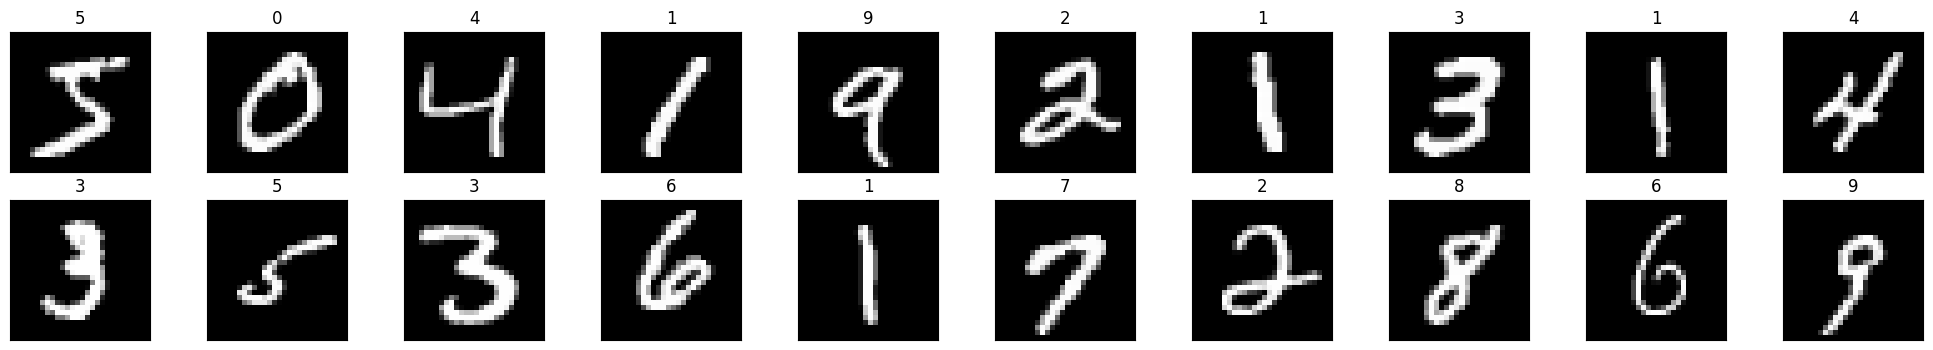

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

View an Image in More Detail

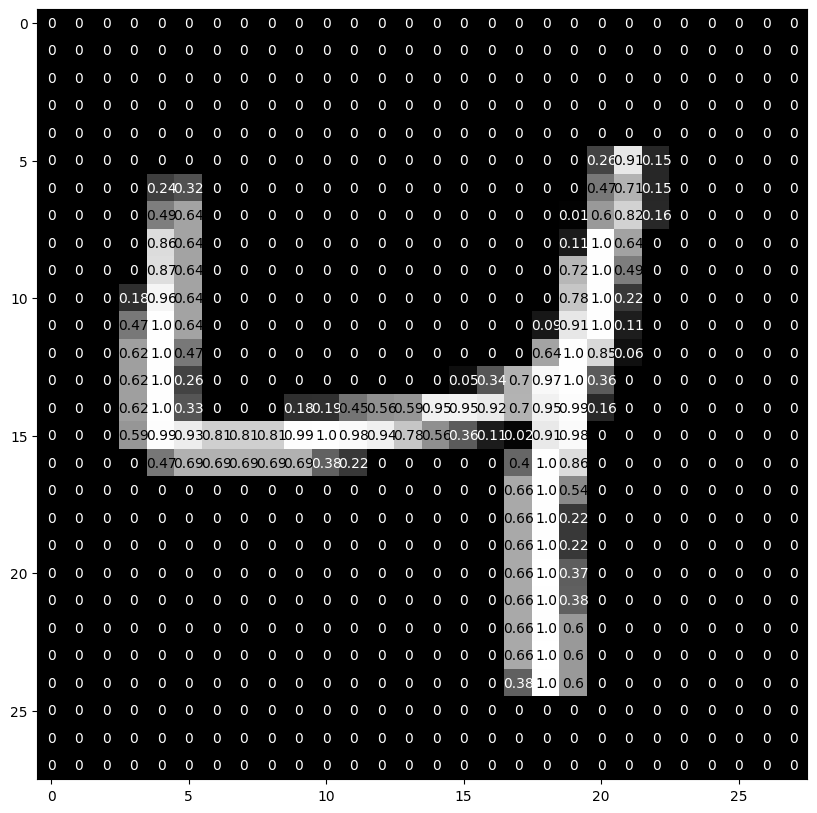

In [ ]:
img = np.squeeze(images[2])

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

## "Linear" model

### Initialization

Let's begin with a simple linear model.  
We need to define a `Model` that implements the NeuralNetwork from Pytorch.  
Then we add a `Dense` layer that has 28*28=784 input nodes (one for each pixel in the input image) and 10 output nodes. The `Linear` layer connects each input to each output with some weight parameter. 


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(28 * 28, 10)
    
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # we can apply dropout
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = self.fc(x)
        
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc): Linear(in_features=784, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


**Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)**

It's recommended that you use cross-entropy loss for classification. Here the softmax is not explicitly declared as the `CrossEntropyLoss`is expected to be directly applied to logits. (If you look at the documentation (linked above), you can see that PyTorch's cross entropy function applies a Softmax function to the output layer and then calculates the log loss.)


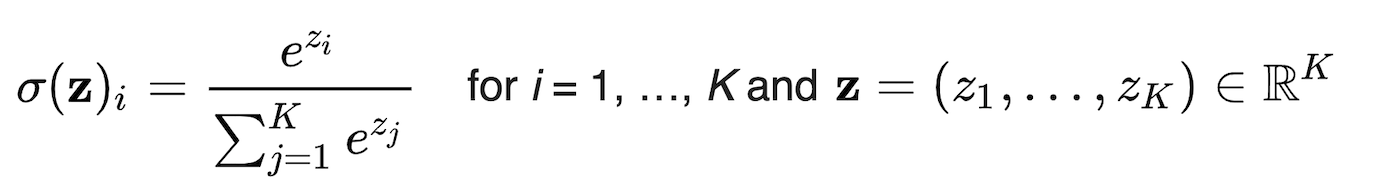


In [ ]:
## Specify loss and optimization functions

# specify loss function. NOTE: it contains the softmax so it is not needed to 
# implement it in the network definition
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Learning

Now we are ready to train our first model.  An *epoch* means one pass through the whole training data. 

The steps for training/learning from a batch of data are described in the comments below:

1.   Clear the gradients of all optimized variables
2.   Forward pass: compute predicted outputs by passing inputs to the model
3.   Calculate the loss between the predicted output and the expected output
4.   Backward pass: compute gradient of the loss with respect to model parameters
5.   Perform a single optimization step (parameter update)
6.   Update average training loss

The following loop trains for 10 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data.

In [ ]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.785728
Epoch: 2 	Training Loss: 0.482344
Epoch: 3 	Training Loss: 0.433067
Epoch: 4 	Training Loss: 0.408798
Epoch: 5 	Training Loss: 0.391489
Epoch: 6 	Training Loss: 0.381712
Epoch: 7 	Training Loss: 0.371912
Epoch: 8 	Training Loss: 0.366284
Epoch: 9 	Training Loss: 0.361200
Epoch: 10 	Training Loss: 0.355940


## Inference

Finally, we test our best model on previously unseen test data and evaluate its performances

`model.eval()` will set all the layers in your model to evaluation mode. This affects layers like dropout layers that turn "off" nodes during training with some probability, but should allow every node to be "on" for evaluation!

In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target.data)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (class_total[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.308320

Test Accuracy of     0: 98% (963/980)
Test Accuracy of     1: 97% (1102/1135)
Test Accuracy of     2: 86% (895/1032)
Test Accuracy of     3: 90% (913/1010)
Test Accuracy of     4: 92% (905/982)
Test Accuracy of     5: 86% (772/892)
Test Accuracy of     6: 94% (909/958)
Test Accuracy of     7: 90% (934/1028)
Test Accuracy of     8: 88% (863/974)
Test Accuracy of     9: 90% (910/1009)

Test Accuracy (Overall): 91% (9166/10000)


*Here* are the first 20 test digits the linear model classified, with the incorrect classification are in red

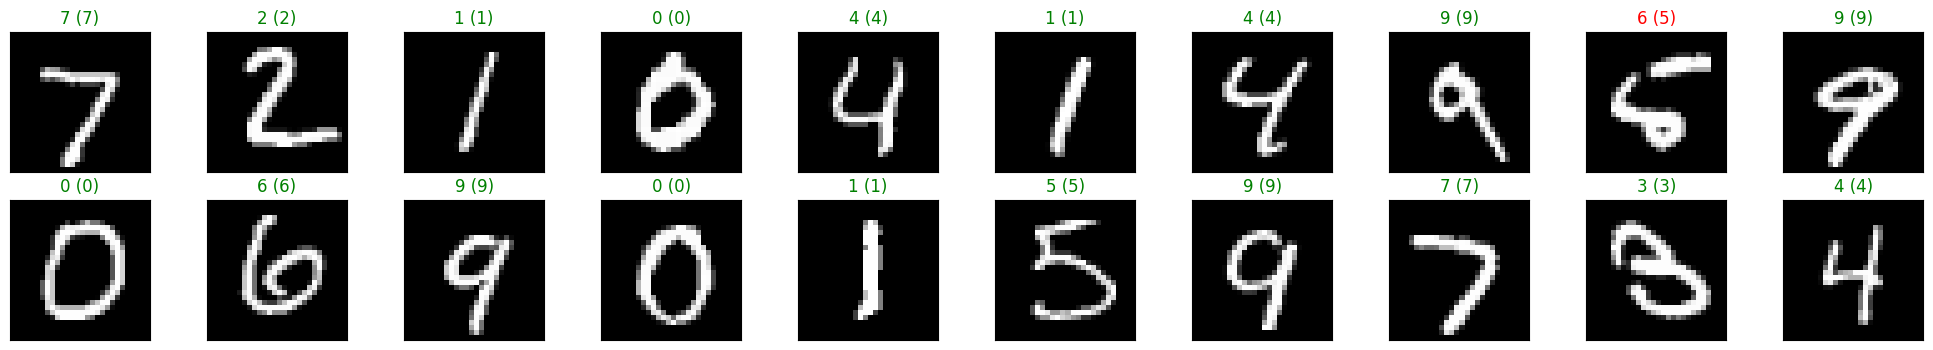

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

## Exercise 1

Train the same model using the Fashion-MNIST (introduced at the beginning of this Notebook) dataset and try to optimize its performance.

## Multi-layer perceptron (MLP) network

### Activation functions

Let's start by plotting some common activation functions for neural networks. `'relu'` stands for rectified linear unit, $y=\max(0,x)$, a very simple non-linearity we will be using in our MLP network below. A more recent and interesting activation function is `'gelu'`, that stands for 'GAUSSIAN ERROR LINEAR UNIT'. It will not be used here but keep it in mind as it can be very usefull for your exercises!

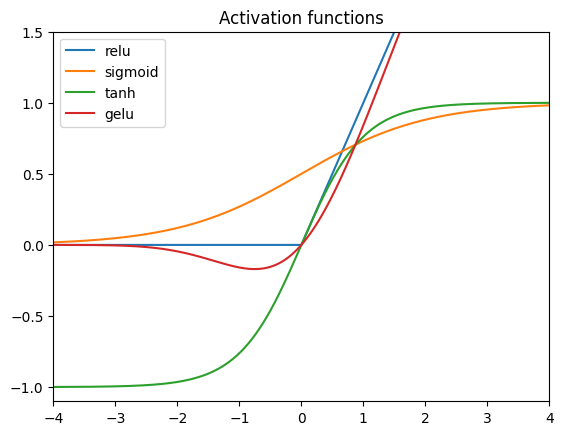

In [ ]:
x = np.arange(-4,4,.01)
plt.figure()
plt.plot(x, np.maximum(x,0), label='relu')
plt.plot(x, 1/(1+np.exp(-x)), label='sigmoid')
plt.plot(x, np.tanh(x), label='tanh')
plt.plot(x, x * (0.5 * (1.0 + np.tanh((np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3)))))), label="gelu")
plt.axis([-4, 4, -1.1, 1.5])
plt.title('Activation functions')
plt.legend(loc='best');

### Initialization

Let's now create a more complex MLP model that has multiple layers, non-linear activation functions, and dropout layers.  `Dropout()` randomly sets a fraction of inputs to zero during training, which is one approach to regularization and can sometimes help to prevent overfitting.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 20)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(20, 20)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(20, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

        self.relu = F.relu

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = self.fc3(self.dropout(self.relu(self.fc2(self.relu(self.fc1(x))))))

        # explicit computation for each layer
        output_first_layer = self.relu(self.fc1(x))
        output_second_layer = self.relu(self.fc2(output_first_layer)
        output = self.fc3(self.dropout(output_second_layer)
        x = output
        return x

# initialize the NN
model2 = MLP()
print(model2)

MLP(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


### Learning
*IMPORTANT*: since the model is changed, the Optimizer **MUST** be updated with the parameters of the new model.

In [ ]:
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.01)

In [ ]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model2.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer2.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model2(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer2.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 1.413995
Epoch: 2 	Training Loss: 0.619760
Epoch: 3 	Training Loss: 0.502855
Epoch: 4 	Training Loss: 0.448857
Epoch: 5 	Training Loss: 0.411543
Epoch: 6 	Training Loss: 0.383480
Epoch: 7 	Training Loss: 0.353751
Epoch: 8 	Training Loss: 0.334962
Epoch: 9 	Training Loss: 0.319347
Epoch: 10 	Training Loss: 0.299717


### Inference

Accuracy for test data.  The model should be somewhat better than the linear model. 

In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model2.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model2(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target.data)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (class_total[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.217026

Test Accuracy of     0: 98% (961/980)
Test Accuracy of     1: 97% (1110/1135)
Test Accuracy of     2: 91% (940/1032)
Test Accuracy of     3: 89% (903/1010)
Test Accuracy of     4: 92% (913/982)
Test Accuracy of     5: 92% (821/892)
Test Accuracy of     6: 94% (903/958)
Test Accuracy of     7: 92% (954/1028)
Test Accuracy of     8: 92% (901/974)
Test Accuracy of     9: 92% (937/1009)

Test Accuracy (Overall): 93% (9343/10000)


Here are the first 20 test digits the MLP classified to a wrong class:

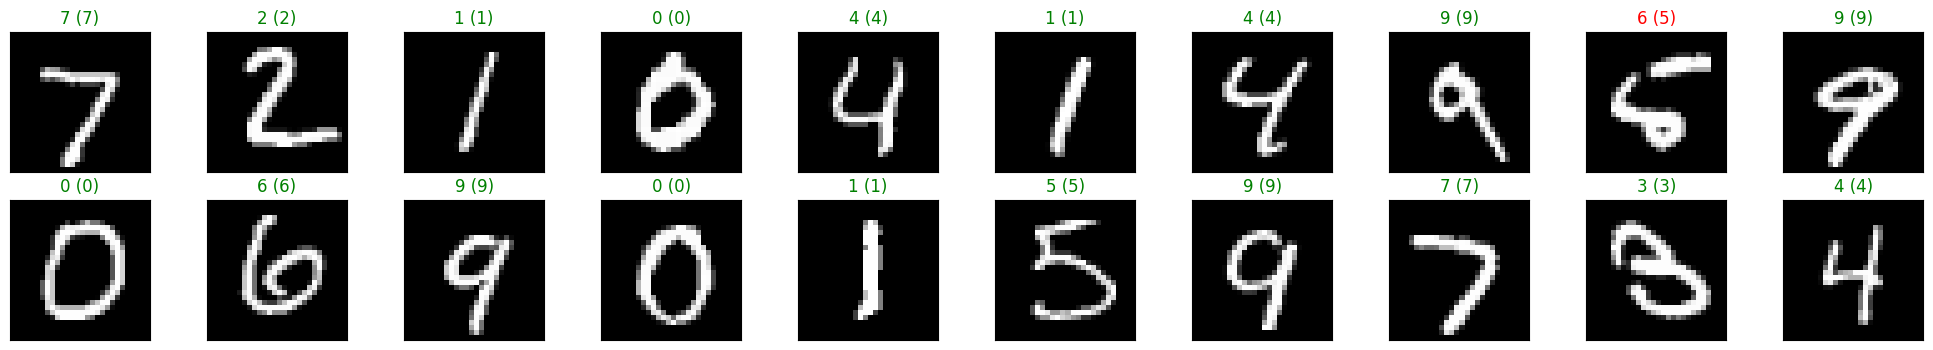

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

# Exercise 2

Design and implement an MLP (for example, with 2 hidden layers and 2-4 neurons for each layer) for the Question Classification dataset. You should already have the dataset saved on your pc!  
Create 2 networks:
- using the BoW representation for the questions;
- using the Neural Encoding from sBERT shown in previous exercises;

The train the network and evaluate it maximizing the resulting F1-score.


**Hints**: 
- Upload the dataset files on the colab machine in order to access them.
- The input layer needs to be equal to the number of features:  
  - BoW representations has 11.000 features? You need 11.000 input neurons.  
  - sBERT representation has 768 features? You need 768 neurons!
- The output layer needs to be same size as the number of total classes.
- In order to maximize the F1-score, you should tweak some hyperparameters such as: `learning_rate`, `dropout`, number of `layers`/`neurons`, `activation function`, `loss function`, number of `epochs`, ..